This example file is intended to cover all the computations for the computations in the publication

    Bankmann, D.; Mehrmann, V.; Nesterov, Y.; van Dooren, P., Analytic Center for the Passivity LMI, 2018

    Beatti, C. ; Mehrmann, V.; van Dooren, P., Analytic Center for the Passivity LMI, 2018

# Initialization

In [1]:
import logging
import numpy as np
from os.path import join, dirname
from analyticcenter import WeightedSystem, get_algorithm_object
from analyticcenter.visualize import log_log_direction
from analyticcenter.examples.example2 import sys
print("A =\n{}\nB\n= {}\nC\n= {}\nD\n= {}\nQ\n= {}\nR\n= {}\nS\n= {}".format(sys.A, sys.B, sys.C, sys.D, sys.Q, sys.R, sys.S))

A =
[[-1.50080778 -1.21394292 -1.21710862 -0.77574412 -0.74807037 -1.05679792]
 [-1.21394292 -1.49357659 -1.44229751 -0.89131319 -0.9786902  -1.06565598]
 [-1.21710862 -1.44229751 -1.97541223 -1.02108958 -1.12364604 -1.01412435]
 [-0.77574412 -0.89131319 -1.02108958 -1.00615708 -0.85553077 -0.82423194]
 [-0.74807037 -0.9786902  -1.12364604 -0.85553077 -1.17729466 -0.59814881]
 [-1.05679792 -1.06565598 -1.01412435 -0.82423194 -0.59814881 -1.44542016]]
B
= [[-0.88460048 -0.97766091 -0.8613933 ]
 [-1.06813806 -1.09817175 -0.77425021]
 [-1.25260106 -1.60303795 -1.01843476]
 [-0.84566917 -1.02193516 -0.68000456]
 [-0.84269114 -1.0559086  -0.58483921]
 [-0.92523203 -0.83030147 -0.70661035]]
C
= [[0.88460048 1.06813806 1.25260106 0.84566917 0.84269114 0.92523203]
 [0.97766091 1.09817175 1.60303795 1.02193516 1.0559086  0.83030147]
 [0.8613933  0.77425021 1.01843476 0.68000456 0.58483921 0.70661035]]
D
= [[1.06208875 0.97030433 0.82668293]
 [0.97030433 1.49781723 0.80937585]
 [0.82668293 0.809

# Computation of analytic center with the newton approach.

In [2]:
print(__debug__)
logger = logging.getLogger()

alg_newton = get_algorithm_object(sys, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton, success) = alg_newton()

True
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:55)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 0.0004566734778481469 (initialization.py:65)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 1.5284051272815766e-21 (initialization.py:76)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:82)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 4.893915545882789	Det: 0.000

# Computation of characteristic values

Compute the characterisic values, as in the paper 'Beattie, Mehrmann, van Dooren'.
Note, that the values compared to the paper slightly changed, because of some improvements in the alogorithm and thus slightly different value for the analytic center.

In [3]:
ac_newton.compute_characteristic_values()

[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of H(X): 0.0024314846790176032 (analyticcenter.py:36)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of X-1 * H(X) * X^-1: 0.0010624675830215816 (analyticcenter.py:46)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of X^-.5 * H(X) * X^-.5: 0.0023820584780827286 (analyticcenter.py:56)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of R of the pH realization: 0.1254027700802573 (analyticcenter.py:65)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Distance to stability is: (0.10350355422251566, 0.0) (analyticcenter.py:67)


# Generate plot of the algorithm

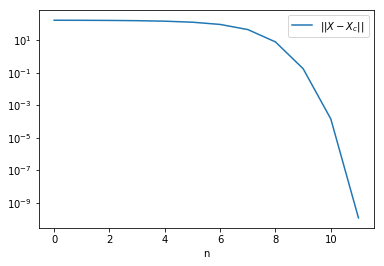

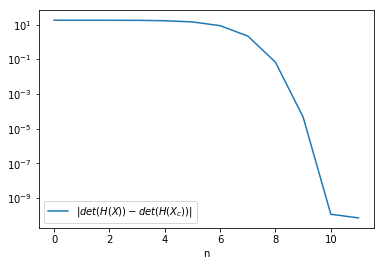

In [4]:
log_log_direction(alg_newton.intermediate_X, alg_newton.intermediate_det)

# Computation with steepest ascent approach

*Warning*: This needs some time and does not even succeed in 20000 iterations, even though the determinant increases in every step.

In [7]:
alg_steepest_ascent = get_algorithm_object(sys, 'steepestascent', discrete_time=False, save_intermediate=True)
alg_steepest_ascent.abs_tol = 10e-1
alg_steepest_ascent.maxiter = 2000000
X0=alg_newton.intermediate_X[6]
alg_steepest_ascent(X0=X0)

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:245)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:265)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:282)
[[  3.74097345  -2.64121472   1.73119664  -6.427114     4.30915479   1.01987113]
 [ -2.64121472  14.88750653   7.14348593   4.59898567 -18.48375553 -10.1926051 ]
 [  1.73119664   7.14348593  17.97273042 -19.72537934 -10.49348071  -5.6182101 ]
 [ -6.427114     4.59898567 -19.72537934  39.8755836   -6.07451908  -2.05603274]
 [  4.30915479 -18.48375553 -10.49348071  -6.07451908  32.09065706   8.4191889 ]
 [  1.01987113 -10.1926051   -5.6182101   -2.05603274   8.4191889   15.49635376]]
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:55)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 0.0004566734778481469 (initia

KeyboardInterrupt: 

In [ ]:
log_log_direction(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det)